# Test Finding Nemo LIWC

In [1]:
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

## Load data

In [14]:
liwc_counts = pd.read_csv('../data/subtitles/subtitlesInTSV/finding_nemo_clean_LIWC_slice_counts.tsv', sep='\t', index_col=False)

In [15]:
print(liwc_counts.head())

   anger  death  family  first_person_plural  first_person_singular  home  \
0      0      0       0                    2                      2     1   
1      0      0       1                    1                      3     3   
2      0      0       1                    0                      1     0   
3      0      0       1                    1                      2     0   
4      0      0       2                    2                      3     1   

   humans  insight  negative_affect  percept  positive_affect  sadness  \
0       2        3                0        7               10        0   
1       1        2                0        2                5        1   
2       0        0                0        0                2        0   
3       0        3                1        3                5        1   
4       2        5                2        4                8        0   

   social  slice  
0      14      0  
1      12      1  
2       2      2  
3       5      3

In [16]:
liwc_categories = sorted(filter(lambda x: x != 'slice', liwc_counts.columns))
print(liwc_categories)

['anger', 'death', 'family', 'first_person_plural', 'first_person_singular', 'home', 'humans', 'insight', 'negative_affect', 'percept', 'positive_affect', 'sadness', 'social']


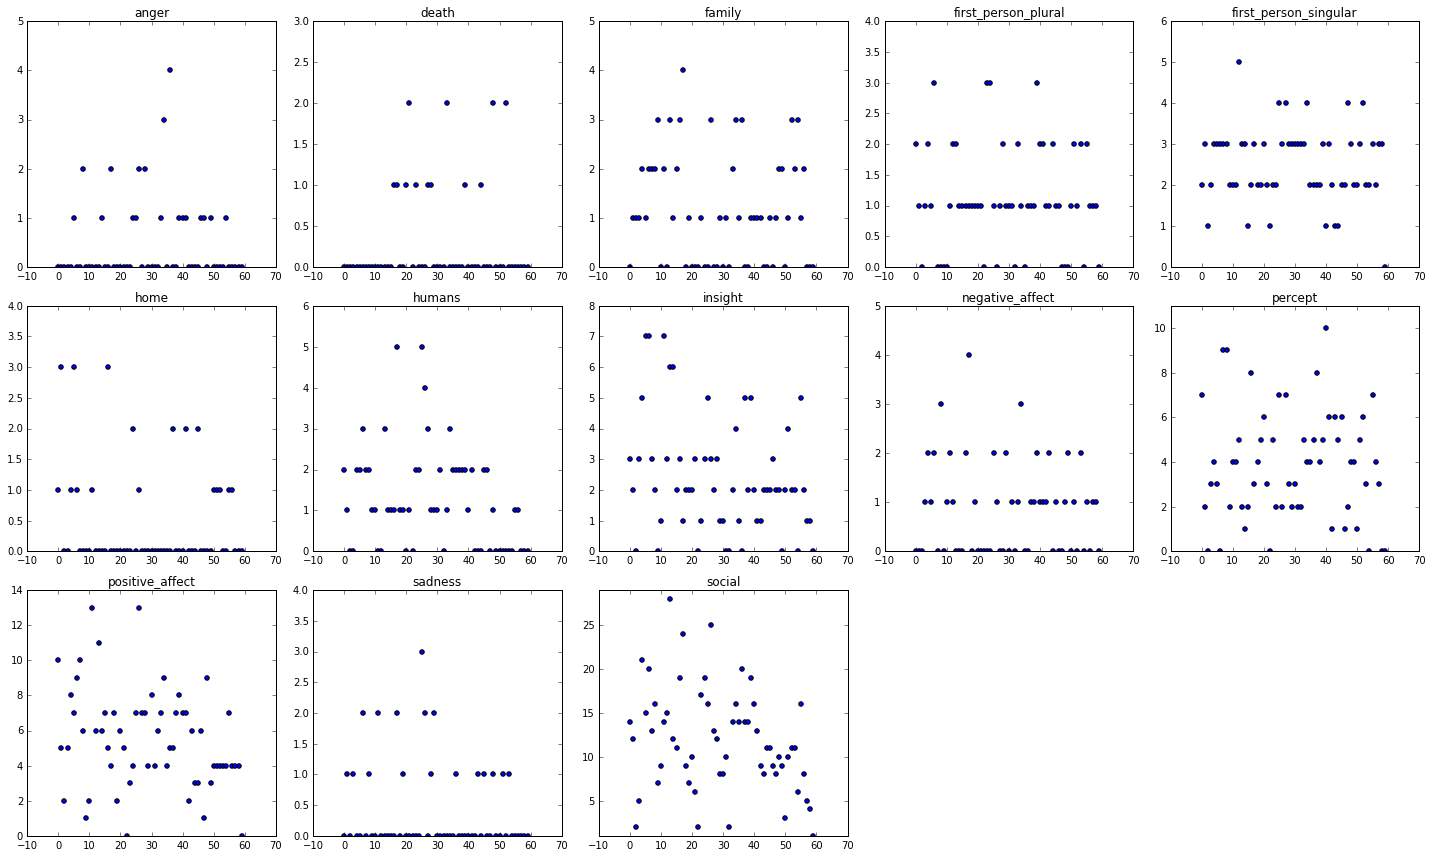

In [17]:
C = len(liwc_categories)
cols = 5
rows = int(C / cols) + 1
size = 4
plt.figure(figsize=(cols * size, rows * size))
slices = liwc_counts['slice']
for i, c in enumerate(liwc_categories):
    plt.subplot(rows, cols, i+1)
    counts = liwc_counts[c]
    plt.scatter(slices, counts)
    plt.title(c)
    plt.ylim(counts.min(), counts.max()+1)
plt.tight_layout()
plt.show()

780
780


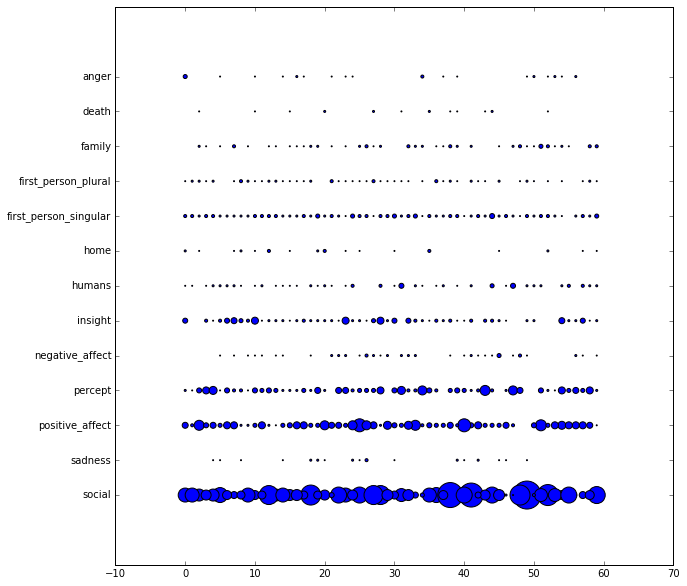

In [31]:
# replicate bubble plot
liwc_categories = list(reversed(liwc_categories))
plt.figure(figsize=(10,10))
ypos = range(len(liwc_categories))
all_ypos = list(reduce(lambda x,y: x+y, [ypos for _ in range(len(slices))]))
print(len(all_ypos))
all_slices = list(reduce(lambda x,y: x+y, [slices.tolist() for _ in ypos]))
print(len(all_slices))
plt.scatter(all_slices, all_ypos, s=liwc_counts[liwc_categories]**2)
plt.yticks(ypos, liwc_categories)
plt.show()

## Sanity checks

In [32]:
# load actual words
liwc_words = pd.read_csv('../data/subtitles/subtitlesInTSV/finding_nemo_clean_LIWC_slice_words.tsv', sep='\t', index_col=False)

In [34]:
liwc_words.fillna('', inplace=True)
liwc_words.head()

,anger,death,family,first_person_plural,first_person_singular,home,humans,insight,negative_affect,percept,positive_affect,sadness,social,slice
0,,,,our we,i my,neighborhood,kids man,believe know think,,beautiful eyes honey look said see view,amazing awesome beautiful best better easy goo...,,he honey kids man neighborhood our said talkin...,0
1,,,parents,we,i me my,bedroom house window,kids,remember think,,look see,cutie fine like ok well,miss,everybody excuse he kids met name parents thei...,1
2,,,daddy,,i,,,,,,ok promise,,daddy you,2
3,,,dad,we,i me,,,answer feel question,wrong,brush feel see,excited fine lucky ok sure,missed,dad question tell we you,3
4,,,dad mom,us we,i me my,door,boy guys,know knowledge learn remember wonder,doubt shocking,look sandy says see,funnier funny joke like ok ready safe well,,ask boy bye dad excuse give guys he hey him hi...,4


In [36]:
for c in liwc_categories:
    print(c)
    print(liwc_words[c].head())

social
0    he honey kids man neighborhood our said talkin...
1    everybody excuse he kids met name parents thei...
2                                            daddy you
3                             dad question tell we you
4    ask boy bye dad excuse give guys he hey him hi...
Name: social, dtype: object
sadness
0          
1      miss
2          
3    missed
4          
Name: sadness, dtype: object
positive_affect
0    amazing awesome beautiful best better easy goo...
1                              cutie fine like ok well
2                                           ok promise
3                           excited fine lucky ok sure
4           funnier funny joke like ok ready safe well
Name: positive_affect, dtype: object
percept
0    beautiful eyes honey look said see view
1                                   look see
2                                           
3                             brush feel see
4                        look sandy says see
Name: percept, dtype: object
neg